In [16]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [17]:
%matplotlib notebook

import numpy as np
import control as control
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sympy as sym
# from IPython.display import Markdown # For displaying Markdown and LaTeX code

sym.init_printing()
continuous_update=False

## Odstopek v stacionarnem stanju - sistemi z enotsko povratno zvezo

Če poznamo prenosni funkciji vstopnega signala $I(s)$ in zaprtozančnega sistema $G(s)$, je odstopek v stacionarnem stanju $e(\infty)$ zaprtozančnih sistemov z enotsko povratno zvezo določen kot:

\begin{equation}
    e(\infty)=\lim_{s\to0}\frac{sI(s)}{1+G(s)}.
\end{equation}

V primeru enotske skočne funkcije $I(s)=\frac{1}{s}$ odstopek zapišemo kot:

\begin{equation}
    e_{step}(\infty)=\frac{1}{1+\lim_{s\to0}G(s)},
\end{equation}

v primeru enotske rampe $I(s)=\frac{1}{s^2}$ kot:

\begin{equation}
    e_{ramp}(\infty)=\frac{1}{\lim_{s\to0}sG(s)},
\end{equation}

in v primeru parabolične vstopne funkcije $I(s)=\frac{1}{s^3}$ kot:

\begin{equation}
    e_{parabolic}(\infty)=\frac{1}{\lim_{s\to0}s^2G(s)}.
\end{equation}


### Sistemi brez integracijskih komponent

Prenosno funkcijo sistema brez integracijskih komponent $G(s)$ lahko zapišemo kot:

\begin{equation}
    G(s) = \frac{K}{as^2 + bs + c}
\end{equation}

Odstopek v stacionarnem stanju je v primeru sistemov brez integracijski komponent v direktni poti neskončen za rampo in parabolično vstopno funkcijo.

### Sistemi z eno integracijsko komponento

Prenosno funkcijo sistema z eno integracijsko komponento $G(s)$ lahko zapišemo kot:

\begin{equation}
    G(s) = \frac{K(as^2 + bs + c)}{s(ds^2 + es + fc)}
\end{equation}

Odstopek v stacionarnem stanju je v primeru sistemov z eno integracijsko komponento v direktni poti neskončen za parabolično vstopno funkcijo.

---

### Kako upravljati s tem interaktivnim primerom?

- Preklapljaš lahko med sistemom brez integracijskih komponent in sistemom z eno integracijsko komponento.
- Z uporabo drsnikov spreminjaš vrednosti $a$, $b$, $c$ (koeficienti prenosne funkcije) in $K$ (ojačanje).

<IPython.core.display.Javascript object>


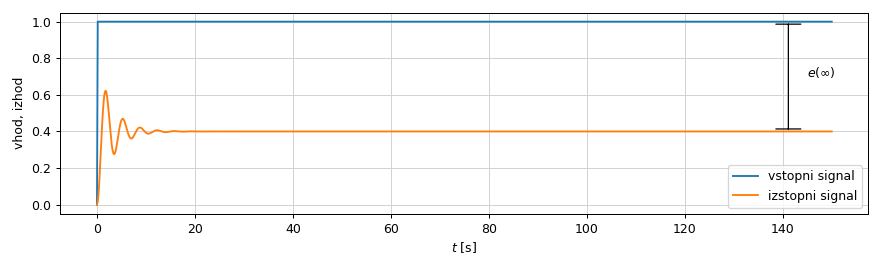

ToggleButtons(description='Izberi sistem: ', options=(('brez integracijski komponent', 0), ('z eno integracijs…

ToggleButtons(description='Izberi vstopni signal: ', options=(('enotska skočna funkcija', 0), ('enotska rampa'…

IntSlider(value=1, continuous_update=False, description='$K$', max=8, min=1)

IntSlider(value=1, continuous_update=False, description='$a$', max=8)

IntSlider(value=2, continuous_update=False, description='$b$', max=8)

IntSlider(value=6, continuous_update=False, description='$c$', max=8, min=1)

Output()

In [18]:
style = {'description_width': 'initial','button_width':'180px'}

layout1 = widgets.Layout(width='auto', height='auto') #set width and height

systemSelect = widgets.ToggleButtons(
    options=[('brez integracijski komponent', 0), ('z eno integracijsko komponento', 1)],
    description='Izberi sistem: ',style = {'description_width': 'initial','button_width':'230px'})
functionSelect = widgets.ToggleButtons(
    options=[('enotska skočna funkcija', 0), ('enotska rampa', 1), ('parabolična funkcija', 2)],
    description='Izberi vstopni signal: ',style=style)

fig=plt.figure(num='Odstopek v stacionarnem stanju')
fig.set_size_inches((9.8,3))
fig.set_tight_layout(True)
f1 = fig.add_subplot(1, 1, 1)

f1.grid(which='both', axis='both', color='lightgray')

f1.set_ylabel('vhod, izhod')
f1.set_xlabel('$t$ [s]')

inputf, = f1.plot([],[])
responsef, = f1.plot([],[])
errorf, = f1.plot([],[])

ann1=f1.annotate("", xy=([0], [0]), xytext=([0], [0]))
ann2=f1.annotate("", xy=([0], [0]), xytext=([0], [0]))

display(systemSelect)
display(functionSelect)

def create_draw_functions(K,a,b,c,index_system,index_input):
    
    num_of_samples = 1000
    total_time = 150
    t = np.linspace(0, total_time, num_of_samples) # time for which response is calculated (start, stop, step)
    
    if index_system == 0:
        
        Wsys = control.tf([K], [a, b, c])
        ess, G_s, s, n  = sym.symbols('e_{step}(\infty), G(s), s, n')
        sys1 = control.feedback(Wsys)
    
    elif index_system == 1:
        
        Wsys = control.tf([K,K,K*a], [1, b, c, 0])
        ess, G_s, s, n  = sym.symbols('e_{step}(\infty), G(s), s, n')
        sys1 = control.feedback(Wsys)    
            
    global inputf, responsef, ann1, ann2
    
    if index_input==0:
        infunction = np.ones(len(t))
        infunction[0]=0
        tout, yout = control.step_response(sys1,t)
        s=sym.Symbol('s')
        if index_system == 0:
            limit_val = sym.limit((K/(a*s**2+b*s+c)),s,0)
        elif index_system == 1:
            limit_val = sym.limit((K*s*s+K*s+K*a)/(s*s*s+b*s*s+c*s),s,0)
        e_inf=1/(1+limit_val)
            
    elif index_input==1:
        infunction=t;
        tout, yout, xx = control.forced_response(sys1, t, infunction)
        if index_system == 0:
            limit_val = sym.limit(s*(K/(a*s**2+b*s+c)),s,0)            
        elif index_system == 1:
            limit_val = sym.limit(s*((K*s*s+K*s+K*a)/(s*s*s+b*s*s+c*s)),s,0)
        e_inf=1/limit_val
        
    elif index_input==2:
        infunction=t*t
        tout, yout, xx = control.forced_response(sys1, t, infunction)
        if index_system == 0:
            limit_val = sym.limit(s*s*(K/(a*s**2+b*s+c)),s,0)
        elif index_system == 1:
            limit_val = sym.limit(s*s*((K*s*s+K*s+K*a)/(s*s*s+b*s*s+c*s)),s,0)
        e_inf=1/limit_val
        
    ann1.remove()
    ann2.remove() 
    
    if type(e_inf) == sym.numbers.ComplexInfinity:
        print('Odstopek v stacionarnem stanju je neskončen.')
    elif e_inf==0:
        print('Odstopek v stacionarnem stanju je enak 0.')
    else:
        print('Odstopek v stacionarnem stanju je enak %f.'% (e_inf,)) 
        
#     if type(e_inf) == sym.numbers.ComplexInfinity:
#         display(Markdown('Steady-state error is infinite.'))
#     elif e_inf==0:
#         display(Markdown('Steady-state error is zero.'))
#     else:
#         display(Markdown('Steady-state error is equal to %f.'%(e_inf,)))

    
    if type(e_inf) != sym.numbers.ComplexInfinity and e_inf>0:  
        ann1=plt.annotate("", xy=(tout[-60],infunction[-60]), xytext=(tout[-60],yout[-60]), arrowprops=dict(arrowstyle="|-|", connectionstyle="arc3"))
        ann2=plt.annotate("$e(\infty)$", xy=(145, 1.), xytext=(145, (yout[-60]+(infunction[-60]-yout[-60])/2)))
    elif type(e_inf) == sym.numbers.ComplexInfinity:
        ann1=plt.annotate("", xy=(0,0), xytext=(0,0), arrowprops=dict(arrowstyle="|-|", connectionstyle="arc3"))
        ann2=plt.annotate("", xy=(134, 1.), xytext=(134, (1 - infunction[-10])/2 + infunction[-10]))
    elif type(e_inf) != sym.numbers.ComplexInfinity and e_inf==0: 
        ann1=plt.annotate("", xy=(0,0), xytext=(0,0), arrowprops=dict(arrowstyle="|-|", connectionstyle="arc3"))
        ann2=plt.annotate("", xy=(134, 1.), xytext=(134, (1 - yout[-10])/2 + yout[-10]))
    
    f1.lines.remove(inputf)
    f1.lines.remove(responsef)
    
    inputf, = f1.plot(t,infunction,label='vstopni signal',color='C0')
    responsef, = f1.plot(tout,yout,label='izstopni signal',color='C1')
    
    f1.relim()
    f1.autoscale_view()
    
    f1.legend()

K_slider=widgets.IntSlider(min=1,max=8,step=1,value=1,description='$K$',continuous_update=False)
a_slider=widgets.IntSlider(min=0,max=8,step=1,value=1,description='$a$',continuous_update=False)
b_slider=widgets.IntSlider(min=0,max=8,step=1,value=1,description='$b$',continuous_update=False)
c_slider=widgets.IntSlider(min=1,max=8,step=1,value=1,description='$c$',continuous_update=False)

input_data=widgets.interactive_output(create_draw_functions,
                                     {'K':K_slider,'a':a_slider,'b':b_slider,'c':c_slider,
                                      'index_system':systemSelect,'index_input':functionSelect})

def update_sliders(index):
    global K_slider, a_slider, b_slider, c_slider
    
    Kval=[1, 1, 1]
    aval=[1, 1, 1]
    bval=[2, 2, 2]
    cval=[6, 6, 6]
    
    K_slider.value=Kval[index]
    a_slider.value=aval[index]
    b_slider.value=bval[index]
    c_slider.value=cval[index]
    
input_data2=widgets.interactive_output(update_sliders,
                                       {'index':functionSelect})


display(K_slider,a_slider,b_slider,c_slider,input_data)